#**Gender Detection Using OpenCV.**

In [ ]:
# Import Libraries

import cv2 # Impoorting OpenCV Library
import math
import argparse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Gender Detection')

In [ ]:
os.listdir()

['kid1.jpg',
 'woman1.jpg',
 'man1.jpg',
 'girl1.jpg',
 'girl2.jpg',
 'Vinay Photo Comp.jpg',
 'self.jpeg',
 'my_self.jpg',
 'opencv_face_detector.pbtxt',
 'opencv_face_detector_uint8.pb',
 'gender_deploy.prototxt',
 'age_deploy.prototxt',
 'gender_net.caffemodel',
 'age_net.caffemodel',
 'prudhvi.jpg',
 'ecea2.jpg',
 'svh.jpg',
 'ecea2g.jpg',
 'maik.jpg',
 'lig.jpg',
 'srk.jpg',
 'faf.jpg',
 'mi4.jpg']

In [ ]:
#Step2- Load models

faceModel = 'opencv_face_detector_uint8.pb'
faceProto = 'opencv_face_detector.pbtxt'
ageModel = 'age_net.caffemodel'
ageProto = 'age_deploy.prototxt'
genderModel = 'gender_net.caffemodel'
genderProto = 'gender_deploy.prototxt'

In [ ]:
#Step-3 Determining labels and mean values

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)','(4-12)', '(13-19)', ('20-30'), ('30-37'), ('38-43'), ('48-53'), ('60-100')]
genderList=['Male', 'Female']

In [ ]:
#step-4 Reading models

faceNet = cv2.dnn.readNet(faceModel,faceProto)
ageNet = cv2.dnn.readNet(ageModel,ageProto)
genderNet = cv2.dnn.readNet(genderModel,genderProto)

##**Image Pre-processing using OpenCV's Deep Neural Network Module**

OpenCV provides two functions under the Deep Neural Network Module to facilitate Image Pre-processing for Deep Learning Classification.

- cv2.dnn.blobFromImage
- cv2.dnn.blobFromImages



In [ ]:
#step-5: function to highlight face in the image
#frame- height, width(200,226)= 200,226; why 4 dimension[None,h,w,c],[128,28,28,3]
#normalise the data
#pass it to facenet model and detect the face

def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0] 
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False) 
    
    #1.0 is the Standard Deviation
    #(300,300) is the output size
    #[104,117,123] are the model mean values. Got from research paper

    #blobFromImage is a function that helps you do image pre-processing
    # [blobFromImage] creates 4-dimensional blob from image. 
    # Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor, swap Blue and Red channels.
    
    # set the input to the pre-trained deep learning network and obtain the output predicted probabilities 
    print(blob.shape)
    net.setInput(blob) #Passing the blob through the network 
    detections=net.forward() #output will be [1,1,200,7] #Grabbing the Detections/Predictions
    faceBoxes=[]

    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)

            faceBoxes.append([x1,y1,x2,y2]) #Bounding Box Co-ordinates

            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes

    #cv2.dnn.blobFromImage function returns a blob which is the input image after mean subtraction, normalizing, and channel swapping.

(1, 3, 300, 300)


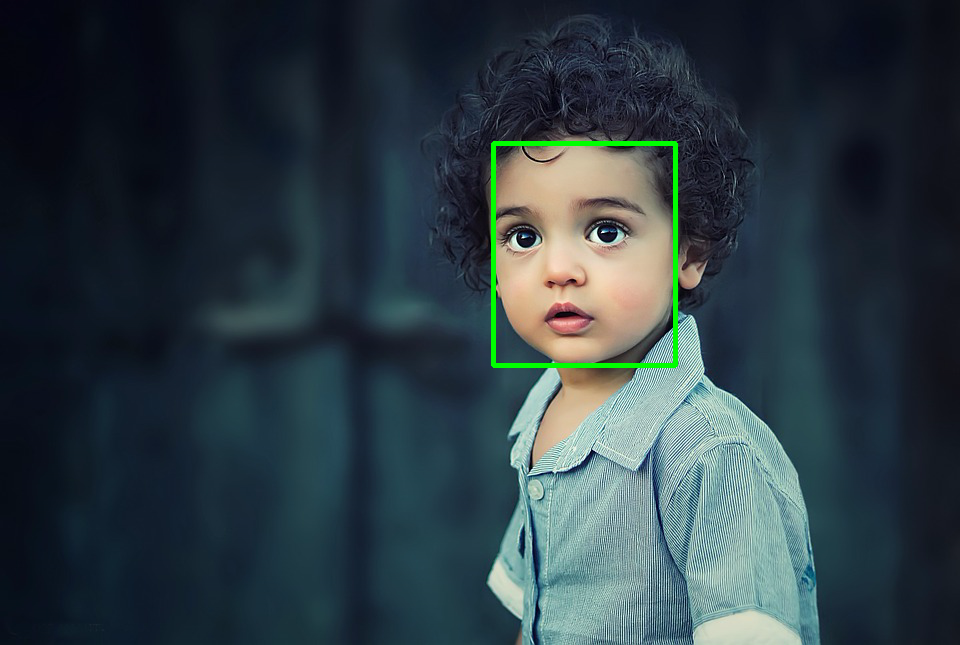

-1

In [ ]:
%matplotlib inline
from google.colab.patches import cv2_imshow
video = cv2.VideoCapture('kid1.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')

cv2_imshow(resultImg)
cv2.waitKey(1)

(1, 3, 300, 300)
(159, 135, 3)
Gender: Female
Age: 38-43 years


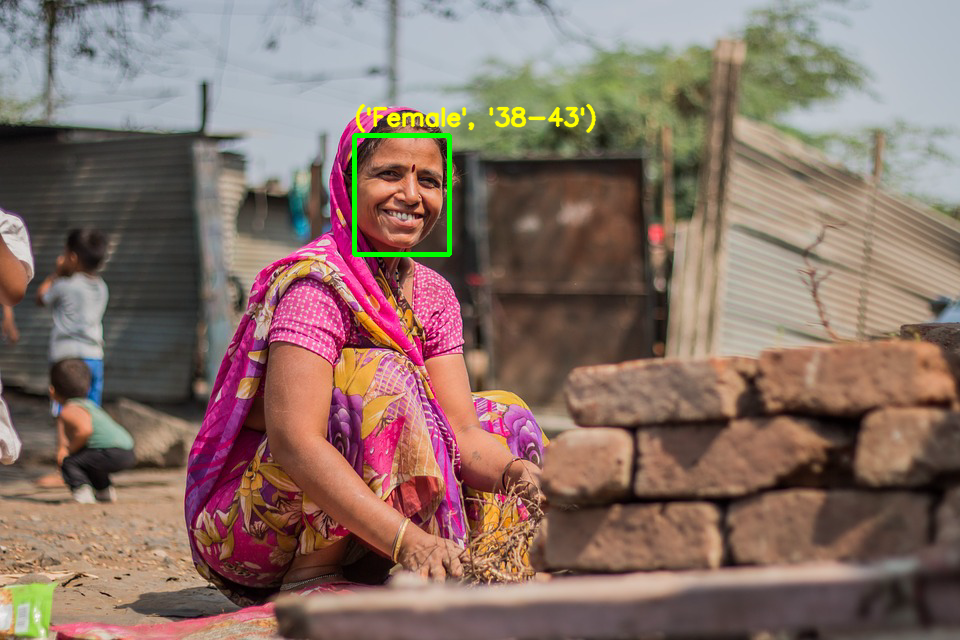

In [ ]:
video = cv2.VideoCapture('woman1.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)


(1, 3, 300, 300)
(180, 148, 3)
Gender: Female
Age: 30-37 years


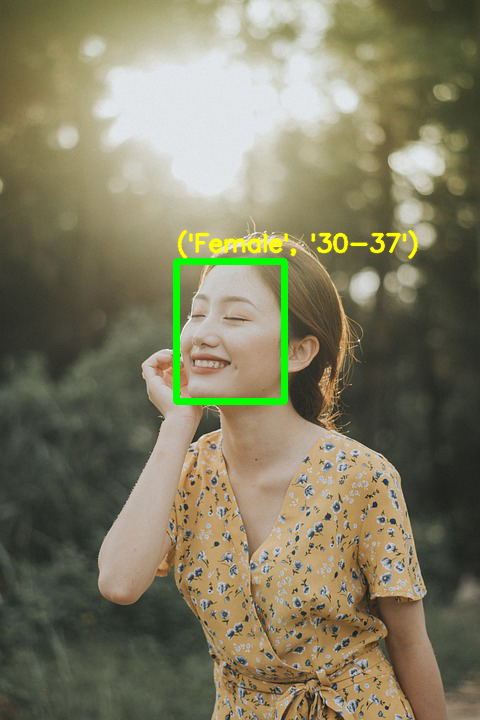

In [ ]:
video = cv2.VideoCapture('girl1.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)


(1, 3, 300, 300)
(404, 340, 3)
Gender: Male
Age: 60-100 years


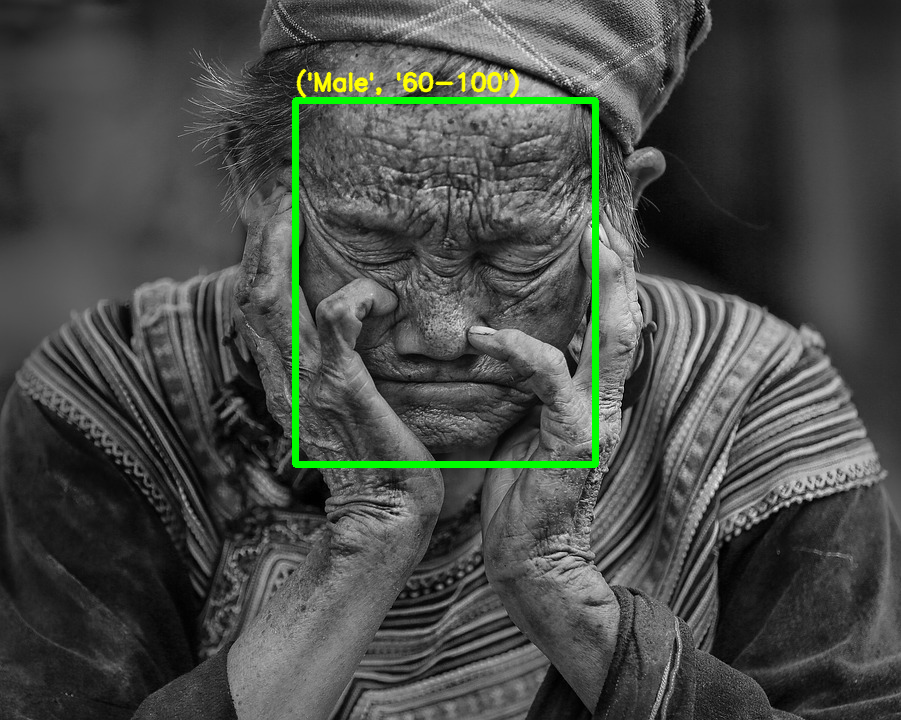

In [ ]:
video = cv2.VideoCapture('man1.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)


In [ ]:
video = cv2.VideoCapture('my_self.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)

(1, 3, 300, 300)
No face detected


(1, 3, 300, 300)
(428, 324, 3)
Gender: Male
Age: 30-37 years


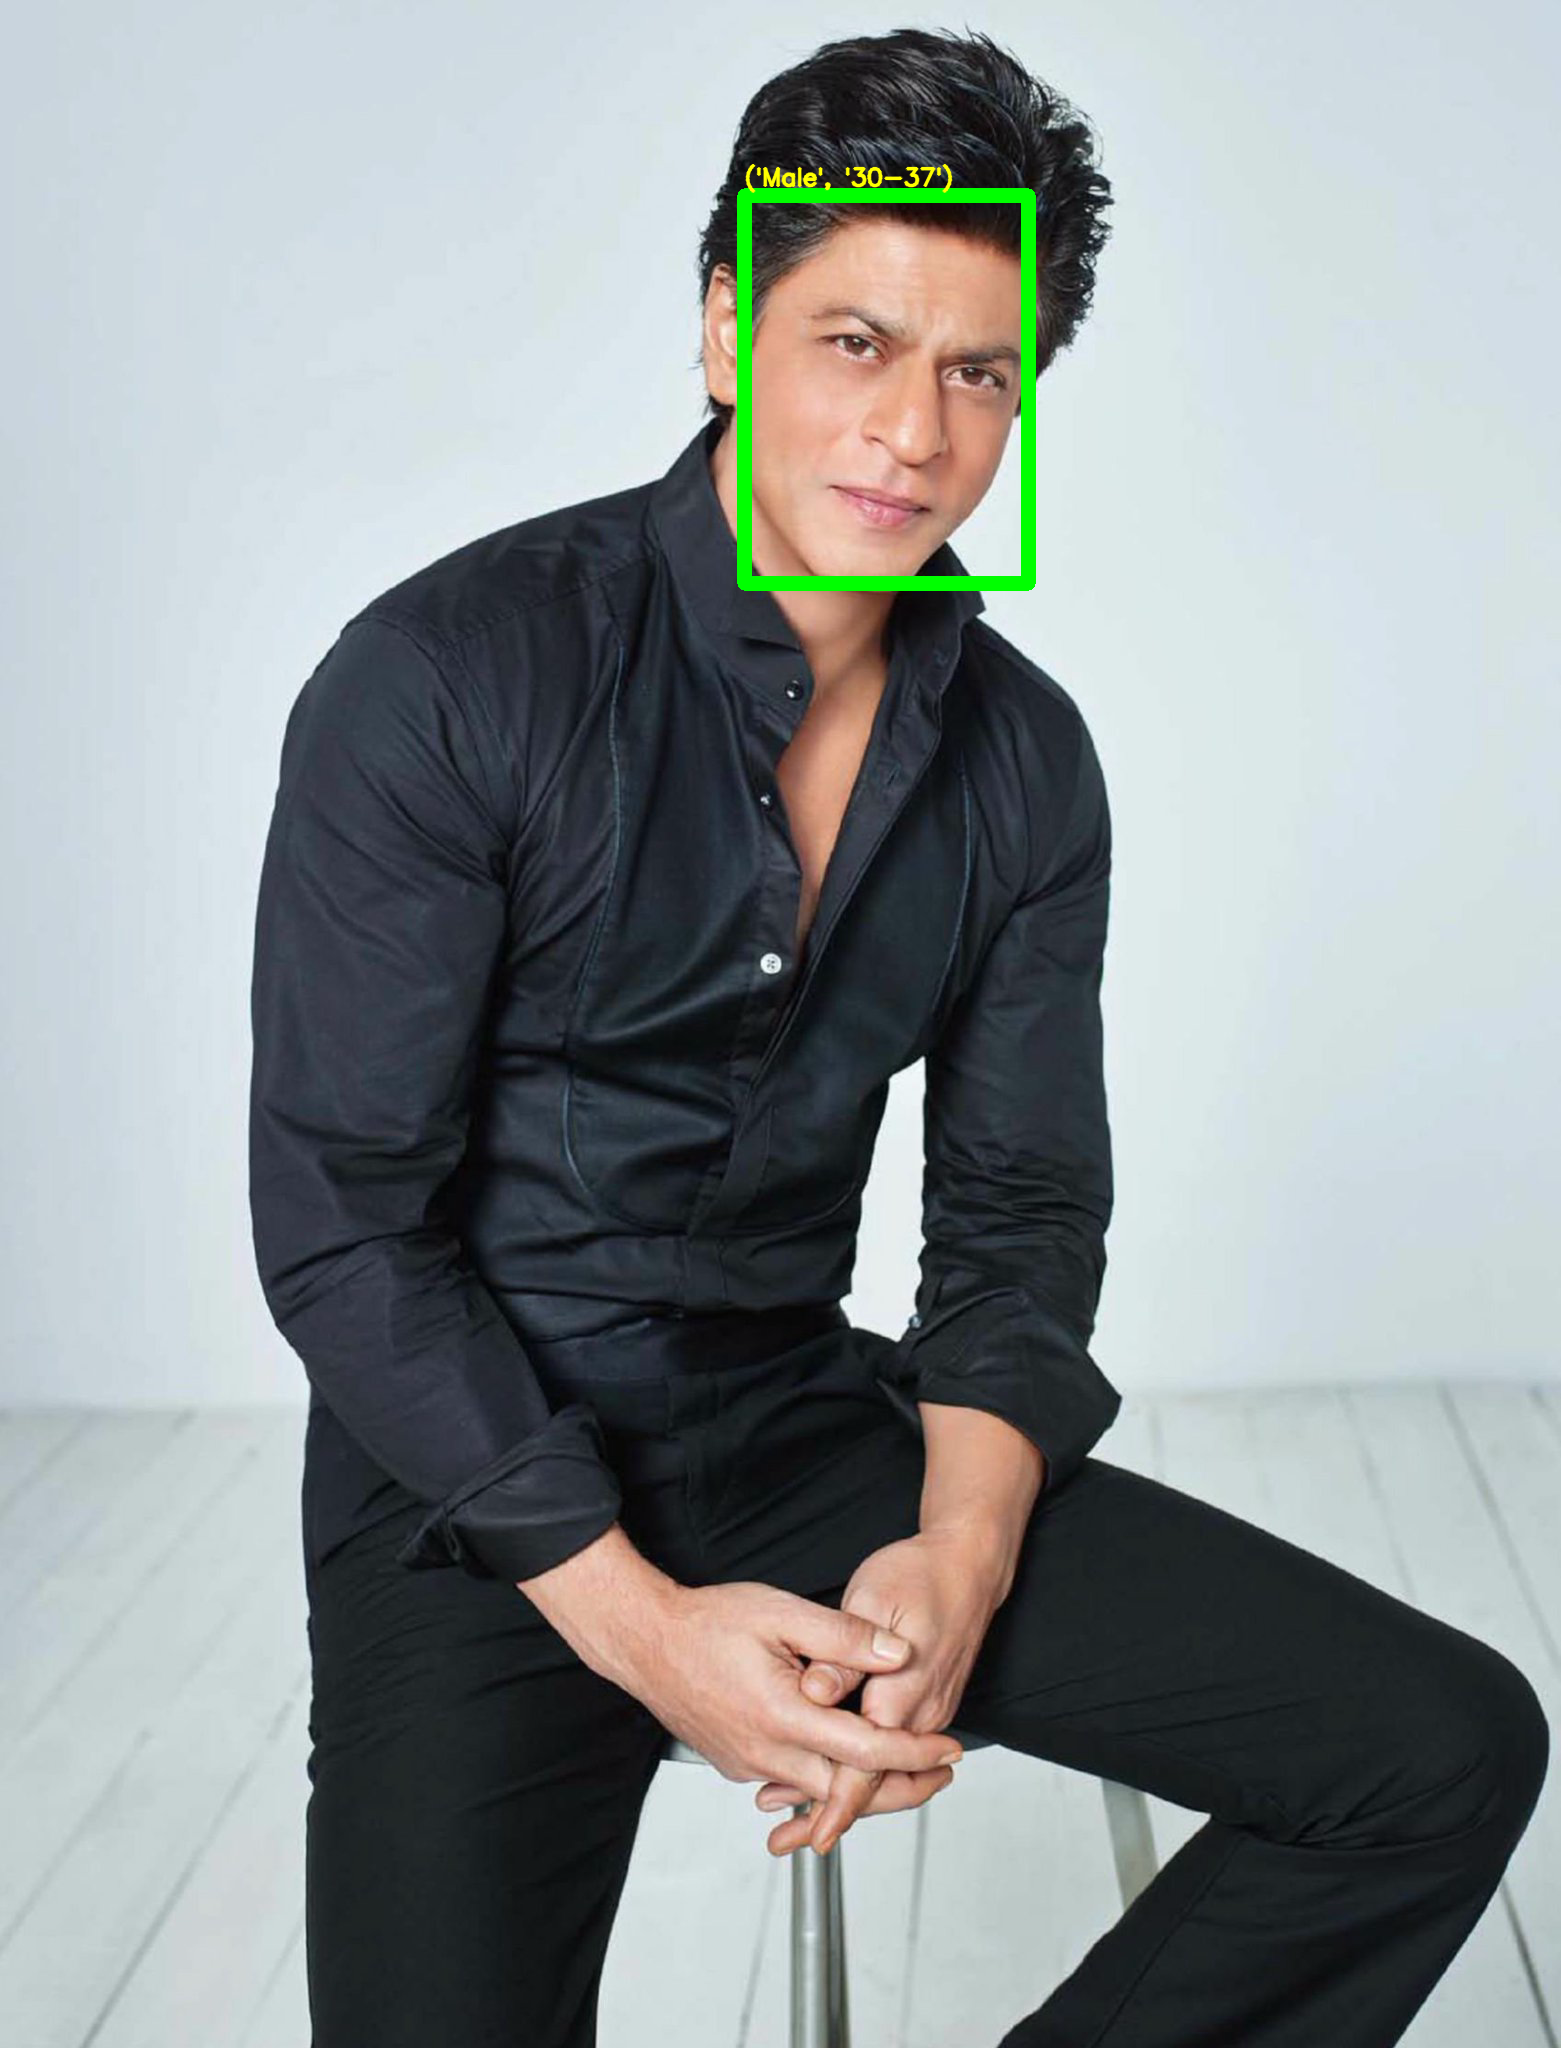

In [ ]:
video = cv2.VideoCapture('srk.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)

In [ ]:
video = cv2.VideoCapture('mi4.jpg')
padding=20
while cv2.waitKey(1)<0:
  hasFrame, frame=video.read()
  if not hasFrame:
    cv2.waitKey()
    break

  resultImg,faceBoxes = highlightFace(faceNet,frame)
  if not faceBoxes:
    print('No face detected')
  
  for faceBox in faceBoxes:
    face = frame[max(0,faceBox[1]-padding):
                 min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                 :min(faceBox[2]+padding, frame.shape[1]-1)]
    print(face.shape)

    blob = cv2.dnn.blobFromImage(face,1.0,(227,227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds=genderNet.forward()
    gender=genderList[genderPreds[0].argmax()]
    print(f'Gender: {gender}')

    ageNet.setInput(blob)
    agePreds=ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(f'Age: {age} years')

    cv2.putText(resultImg, f'{gender,age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    cv2_imshow(resultImg)

Output hidden; open in https://colab.research.google.com to view.